In [133]:
# Import Libraries and Dependencies 

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import urllib.request
import matplotlib.pyplot as plt
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
import seaborn as sb
%matplotlib inline
import pandas_montecarlo
#pip install --user --upgrade matplotlib
#pip install pandas_montecarlo

In [2]:
# grab data set from url *multipul updates each day make sure we are on current tab....

cv_data = pd.read_html('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true#')

In [3]:
#combine all tabs from data set
cv_data =pd.concat(cv_data)
cv_data

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E,F,G,H,I,Unnamed: 0
0,Announcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,We created a GitHub repo: https://github.com/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,It has the same info as this Google Sheet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,"Due to the download limitation, we will soon s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Hope you will enjoy the new data storage place...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [4]:

#remove Strings from 1st row
cv_data.drop([0], inplace=True)
cv_data

,A,B,C,D,E,F,G,H,I,Unnamed: 0
1,We created a GitHub repo: https://github.com/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,It has the same info as this Google Sheet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,"Due to the download limitation, we will soon s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Hope you will enjoy the new data storage place...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,Hubei,Mainland China,2/9/20 23:33,29631,871,1795,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [5]:
#drop "Unnamed:0"

#cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=True)

#cv_data

#rename columns in dataframe

cv_data = cv_data.rename(columns={
    'A':'Province/State',
    'B':'Country/Region',
    'C':'Last_Update',
    'D':'Infected',
    'E':'Deaths',
    'F':'Recovered',
    
})

In [6]:
cv_data.head()

,Province/State,Country/Region,Last_Update,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
1,We created a GitHub repo: https://github.com/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,It has the same info as this Google Sheet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,"Due to the download limitation, we will soon s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Hope you will enjoy the new data storage place...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,Hubei,Mainland China,2/9/20 23:33,29631,871,1795,NaN,NaN,NaN,2


In [7]:
#set index

cv_data =cv_data.set_index('Last_Update')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
Last_Update,,,,,,,,,
NaN,We created a GitHub repo: https://github.com/C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
NaN,It has the same info as this Google Sheet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
NaN,"Due to the download limitation, we will soon s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
NaN,Hope you will enjoy the new data storage place...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2/9/20 23:33,Hubei,Mainland China,29631,871,1795,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN,NaN,NaN,NaN,24
1/21/2020,NaN,Japan,1,NaN,NaN,NaN,NaN,NaN,25
1/21/2020,NaN,Thailand,2,NaN,NaN,NaN,NaN,NaN,26


In [8]:
#drop "Unnamed:0"

cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=False)




In [9]:
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
NaN,We created a GitHub repo: https://github.com/C...,NaN,NaN,NaN,NaN
NaN,It has the same info as this Google Sheet.,NaN,NaN,NaN,NaN
NaN,"Due to the download limitation, we will soon s...",NaN,NaN,NaN,NaN
NaN,Hope you will enjoy the new data storage place...,NaN,NaN,NaN,NaN
2/9/20 23:33,Hubei,Mainland China,29631,871,1795
...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN
1/21/2020,NaN,Japan,1,NaN,NaN
1/21/2020,NaN,Thailand,2,NaN,NaN


In [10]:
cv_data.isnull()

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
NaN,False,True,True,True,True
NaN,False,True,True,True,True
NaN,False,True,True,True,True
NaN,False,True,True,True,True
2/9/20 23:33,False,False,False,False,False
...,...,...,...,...,...
1/21/2020,False,False,True,False,True
1/21/2020,True,False,False,True,True
1/21/2020,True,False,False,True,True


In [11]:
cv_data.dropna(inplace=True)
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 23:33,Hubei,Mainland China,29631,871,1795
2/10/20 3:43,Guangdong,Mainland China,1151,1,147
2/10/20 1:13,Zhejiang,Mainland China,1092,0,201
2/10/20 1:13,Henan,Mainland China,1073,6,169
2/10/20 2:13,Hunan,Mainland China,879,1,186
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [12]:
cv_data.isnull().sum()
cv_data.head()

#cv_data['ratio']= cv_data['Deaths']/ cv_data['Confirmed']

cv_data.dtypes

Province/State    object
Country/Region    object
Infected          object
Deaths            object
Recovered         object
dtype: object

In [13]:
# change types from object to int.
#people_df['Person_ID'] = people_df['Person_ID'].astype('int')

cv_data['Infected'] = cv_data['Infected'].astype('int')
cv_data['Deaths'] = cv_data['Deaths'].astype('int')
cv_data['Recovered'] = cv_data['Recovered'].astype('int')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 23:33,Hubei,Mainland China,29631,871,1795
2/10/20 3:43,Guangdong,Mainland China,1151,1,147
2/10/20 1:13,Zhejiang,Mainland China,1092,0,201
2/10/20 1:13,Henan,Mainland China,1073,6,169
2/10/20 2:13,Hunan,Mainland China,879,1,186
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [14]:
cv_data[['Province/State']].duplicated()

Last_Update
2/9/20 23:33          False
2/10/20 3:43          False
2/10/20 1:13          False
2/10/20 1:13          False
2/10/20 2:13          False
                      ...  
1/25/2020 12:00 PM     True
1/25/2020 12:00 PM     True
1/25/2020 12:00 AM     True
1/24/2020 12:00 PM     True
1/23/20 12:00 PM       True
Length: 951, dtype: bool

In [15]:
#create a for loop to clean up duplicates for each day and get a running total for that days end.
#just use cumprod feature?
cv_data_days= cv_data.drop_duplicates(subset=['Province/State'], inplace=False)

In [16]:
cv_data_days

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/9/20 23:33,Hubei,Mainland China,29631,871,1795
2/10/20 3:43,Guangdong,Mainland China,1151,1,147
2/10/20 1:13,Zhejiang,Mainland China,1092,0,201
2/10/20 1:13,Henan,Mainland China,1073,6,169
2/10/20 2:13,Hunan,Mainland China,879,1,186
2/10/20 2:03,Anhui,Mainland China,830,3,73
2/10/20 1:23,Jiangxi,Mainland China,771,1,102
2/10/20 1:43,Jiangsu,Mainland China,492,0,72
2/9/20 23:53,Chongqing,Mainland China,468,2,51


In [17]:
cv_data_days['Deaths'].sum()

909

In [18]:
cv_data_days['Infected'].sum()

40386

In [19]:
cv_data_days['Recovered'].sum()

3293

In [20]:
#add totals of columns together for their individual daily total to be added to df daily
# replace index with date use current 

cv_data_2= cv_data.reset_index()

In [21]:
cv_data_2


,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
0,2/9/20 23:33,Hubei,Mainland China,29631,871,1795
1,2/10/20 3:43,Guangdong,Mainland China,1151,1,147
2,2/10/20 1:13,Zhejiang,Mainland China,1092,0,201
3,2/10/20 1:13,Henan,Mainland China,1073,6,169
4,2/10/20 2:13,Hunan,Mainland China,879,1,186
...,...,...,...,...,...,...
946,1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
947,1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
948,1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1
949,1/24/2020 12:00 PM,Shanghai,Mainland China,20,22,1


In [22]:

#add new date column to get rid of time stamp
cv_data_2['Last_Update']= pd.to_datetime(cv_data_2.Last_Update)
cv_data_2['Date']= cv_data_2['Last_Update'].dt.strftime('%m/%d/%Y')
print (cv_data_2)


            Last_Update Province/State  Country/Region  Infected  Deaths  \
0   2020-02-09 23:33:00          Hubei  Mainland China     29631     871   
1   2020-02-10 03:43:00      Guangdong  Mainland China      1151       1   
2   2020-02-10 01:13:00       Zhejiang  Mainland China      1092       0   
3   2020-02-10 01:13:00          Henan  Mainland China      1073       6   
4   2020-02-10 02:13:00          Hunan  Mainland China       879       1   
..                  ...            ...             ...       ...     ...   
946 2020-01-25 12:00:00       Shanghai  Mainland China        40      72   
947 2020-01-25 12:00:00       Shanghai  Mainland China        33      72   
948 2020-01-25 00:00:00       Shanghai  Mainland China        33      22   
949 2020-01-24 12:00:00       Shanghai  Mainland China        20      22   
950 2020-01-23 12:00:00      Guangdong  Mainland China        32       1   

     Recovered        Date  
0         1795  02/09/2020  
1          147  02/10/2020  


In [23]:
# Set index as 'Date'
cv_data_2.set_index('Date')

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered
Date,,,,,,
02/09/2020,2020-02-09 23:33:00,Hubei,Mainland China,29631,871,1795
02/10/2020,2020-02-10 03:43:00,Guangdong,Mainland China,1151,1,147
02/10/2020,2020-02-10 01:13:00,Zhejiang,Mainland China,1092,0,201
02/10/2020,2020-02-10 01:13:00,Henan,Mainland China,1073,6,169
02/10/2020,2020-02-10 02:13:00,Hunan,Mainland China,879,1,186
...,...,...,...,...,...,...
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,33,72,1
01/25/2020,2020-01-25 00:00:00,Shanghai,Mainland China,33,22,1


In [24]:
cv_data_2.drop(columns=['Last_Update'])

,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,Hubei,Mainland China,29631,871,1795,02/09/2020
1,Guangdong,Mainland China,1151,1,147,02/10/2020
2,Zhejiang,Mainland China,1092,0,201,02/10/2020
3,Henan,Mainland China,1073,6,169,02/10/2020
4,Hunan,Mainland China,879,1,186,02/10/2020
...,...,...,...,...,...,...
946,Shanghai,Mainland China,40,72,1,01/25/2020
947,Shanghai,Mainland China,33,72,1,01/25/2020
948,Shanghai,Mainland China,33,22,1,01/25/2020
949,Shanghai,Mainland China,20,22,1,01/24/2020


In [25]:
#drop duplicates in order to get the last value for the day
cv_data_2.drop_duplicates(subset=['Province/State', "Date"], inplace=True)
cv_data_2

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-09 23:33:00,Hubei,Mainland China,29631,871,1795,02/09/2020
1,2020-02-10 03:43:00,Guangdong,Mainland China,1151,1,147,02/10/2020
2,2020-02-10 01:13:00,Zhejiang,Mainland China,1092,0,201,02/10/2020
3,2020-02-10 01:13:00,Henan,Mainland China,1073,6,169,02/10/2020
4,2020-02-10 02:13:00,Hunan,Mainland China,879,1,186,02/10/2020
...,...,...,...,...,...,...,...
942,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
943,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
946,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
949,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [26]:
#create new data frame extracting only mainland China info
cv_data_china=cv_data_2.loc[cv_data_2['Country/Region']=='Mainland China']
cv_data_china

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,Date
0,2020-02-09 23:33:00,Hubei,Mainland China,29631,871,1795,02/09/2020
1,2020-02-10 03:43:00,Guangdong,Mainland China,1151,1,147,02/10/2020
2,2020-02-10 01:13:00,Zhejiang,Mainland China,1092,0,201,02/10/2020
3,2020-02-10 01:13:00,Henan,Mainland China,1073,6,169,02/10/2020
4,2020-02-10 02:13:00,Hunan,Mainland China,879,1,186,02/10/2020
...,...,...,...,...,...,...,...
942,2020-01-26 23:00:00,Hubei,Mainland China,1423,76,44,01/26/2020
943,2020-01-26 23:00:00,Shanghai,Mainland China,53,1,1,01/26/2020
946,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,01/25/2020
949,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,01/24/2020


In [27]:
#Group by 'Date' in order to sum all
all_sum_cv = cv_data_china.groupby('Date').sum()

In [28]:
all_sum_cv.reset_index(inplace=True)

In [29]:
all_sum_cv.Date = pd.to_datetime(all_sum_cv.Date)

In [30]:
all_sum_cv.set_index('Date',inplace=True) 

In [31]:
#Find ratio of deaths to confirmed effected
#round decimals .000 
all_sum_cv['death_ratio']= all_sum_cv['Deaths']/ all_sum_cv['Infected']
all_sum_cv['recovered_ratio'] =all_sum_cv['Recovered']/ all_sum_cv['Infected']
#decimals =pd.Series ([3,3], index=['death_ratio', 'recovered_ratio'])
#cv_data.round(decimals)

In [32]:
all_sum_cv['recovered/death'] =all_sum_cv['Recovered']/all_sum_cv['Deaths']
all_sum_cv.head()

,Infected,Deaths,Recovered,death_ratio,recovered_ratio,recovered/death
Date,,,,,,
2020-01-23,32,1,2,0.031250,0.062500,2.000000
2020-01-24,20,22,1,1.100000,0.050000,0.045455
2020-01-25,40,72,1,1.800000,0.025000,0.013889
2020-01-26,1476,77,45,0.052168,0.030488,0.584416
2020-01-27,2860,102,52,0.035664,0.018182,0.509804


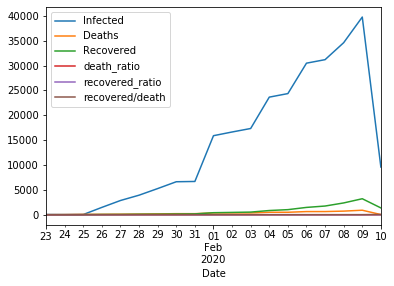

In [33]:
all_sum_cv.plot()

In [34]:
##Monte Carlo Simulation on Corona Virus

In [35]:
#jjp - fixed name
infection_change = all_sum_cv.pct_change()

In [36]:
infection_change.head()

,Infected,Deaths,Recovered,death_ratio,recovered_ratio,recovered/death
Date,,,,,,
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,-0.375000,21.000000,-0.500000,34.200000,-0.200000,-0.977273
2020-01-25,1.000000,2.272727,0.000000,0.636364,-0.500000,-0.694444
2020-01-26,35.900000,0.069444,44.000000,-0.971018,0.219512,41.077922
2020-01-27,0.937669,0.324675,0.155556,-0.316356,-0.403636,-0.127669


In [37]:
# below is Stock Data

In [134]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [135]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

In [136]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-252)

In [137]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


In [138]:
china_df = china_ticker_df.rename(columns={'ASHR':'ASHR (China SH Composite)','CQQQ':'CQQQ (China Technology)', 'CHIE':'CHIE (China Energy)', 'CHIM':'CHIM (China Materials)', 'KURE':'KURE (China Healthcare)', 'CHIS':'CHIS (China Consumer Staples)'})
china_df.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2019-06-03 00:00:00+00:00,26.44,42.13,10.990,15.2485,19.74,19.3290
2019-06-04 00:00:00+00:00,26.36,42.41,10.925,14.9900,19.50,19.1247
2019-06-05 00:00:00+00:00,26.06,42.16,10.860,14.9400,18.81,18.9860
2019-06-06 00:00:00+00:00,26.08,42.06,10.760,14.8400,18.68,18.7885
2019-06-07 00:00:00+00:00,26.22,42.87,10.895,14.9700,18.86,18.9300


In [139]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

In [140]:
china_df.dropna(inplace=True)
china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

In [141]:
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

,ASHR (China SH Composite),CQQQ (China Technology),CHIE (China Energy),CHIM (China Materials),KURE (China Healthcare),CHIS (China Consumer Staples)
date,,,,,,
2019-06-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-04 00:00:00+00:00,-0.003026,0.006646,-0.005914,-0.016952,-0.012158,-0.010570
2019-06-05 00:00:00+00:00,-0.011381,-0.005895,-0.005950,-0.003336,-0.035385,-0.007252
2019-06-06 00:00:00+00:00,0.000767,-0.002372,-0.009208,-0.006693,-0.006911,-0.010402
2019-06-07 00:00:00+00:00,0.005368,0.019258,0.012546,0.008760,0.009636,0.007531


In [142]:
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')

In [143]:
us_df = us_ticker_df.rename(columns={'SPY':'SPY (USA SP500 Composite)', 'IGM':'IGM (USA Technology)', 'IYE':'IYE (USA Energy)', 'IYM':'IYM (USA Materials)', 'IYH':'IYH (USA Healthcare)', 'IECS':'IECS (USA Consumer Staples)'})

us_df.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2019-06-03 00:00:00+00:00,274.57,195.46,32.28,87.69,183.78,26.0727
2019-06-04 00:00:00+00:00,280.53,201.65,32.88,90.33,187.11,26.3061
2019-06-05 00:00:00+00:00,282.96,203.62,32.47,90.72,188.38,26.6179
2019-06-06 00:00:00+00:00,284.80,205.20,32.99,91.53,188.72,26.8719
2019-06-07 00:00:00+00:00,287.65,209.36,33.12,92.13,191.03,27.1349


In [144]:
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY (USA SP500 Composite),IGM (USA Technology),IYE (USA Energy),IYM (USA Materials),IYH (USA Healthcare),IECS (USA Consumer Staples)
date,,,,,,
2019-06-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-04 00:00:00+00:00,0.021707,0.031669,0.018587,0.030106,0.018119,0.008952
2019-06-05 00:00:00+00:00,0.008662,0.009769,-0.012470,0.004318,0.006787,0.011853
2019-06-06 00:00:00+00:00,0.006503,0.007760,0.016015,0.008929,0.001805,0.009542
2019-06-07 00:00:00+00:00,0.010007,0.020273,0.003941,0.006555,0.012240,0.009787


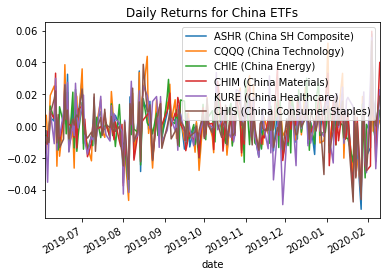

In [145]:
china_daily_returns.plot(title="Daily Returns for China ETFs")

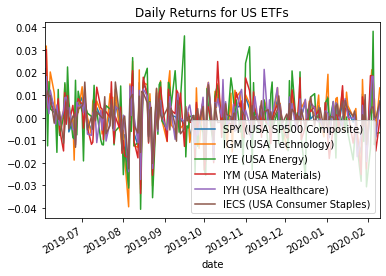

In [146]:
us_daily_returns.plot(title="Daily Returns for US ETFs")

In [147]:
china_std = china_daily_returns.std()
china_std

ASHR (China SH Composite)        0.013504
CQQQ (China Technology)          0.015476
CHIE (China Energy)              0.012493
CHIM (China Materials)           0.014181
KURE (China Healthcare)          0.015521
CHIS (China Consumer Staples)    0.012896
dtype: float64

In [148]:
us_std = us_daily_returns.std()
us_std

SPY (USA SP500 Composite)      0.007789
IGM (USA Technology)           0.010446
IYE (USA Energy)               0.013107
IYM (USA Materials)            0.009924
IYH (USA Healthcare)           0.007986
IECS (USA Consumer Staples)    0.006425
dtype: float64

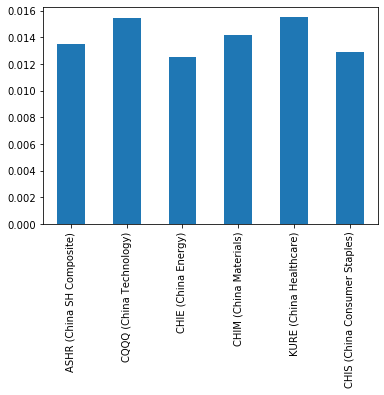

In [149]:
china_std.plot.bar()

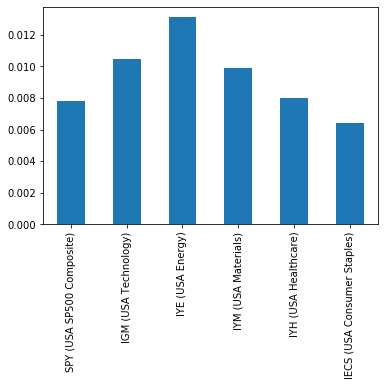

In [150]:
us_std.plot.bar()

In [151]:
#only need to run this once to normalize the 
all_sum_cv.index = all_sum_cv.index.tz_localize('UTC')

TypeError: Already tz-aware, use tz_convert to convert.

In [ ]:
## Correlation Studies

In [ ]:
china_cv_raw_df = pd.concat([china_df, all_sum_cv], axis=1, sort=True)
china_cv_raw_df.dropna(inplace=True)

In [152]:
usa_cv_raw_df = pd.concat([us_df, all_sum_cv], axis=1, sort=True)
usa_cv_raw_df.dropna(inplace=True)

In [153]:
usa_china_raw_df = pd.concat([us_df, china_df], axis=1, sort=True)
usa_china_raw_df.dropna(inplace=True)

In [154]:
all_data_raw_df = pd.concat([us_df, china_df, all_sum_cv], axis=1, sort=True)
all_data_raw_df.dropna(inplace=True)
#may need to take out duplicates

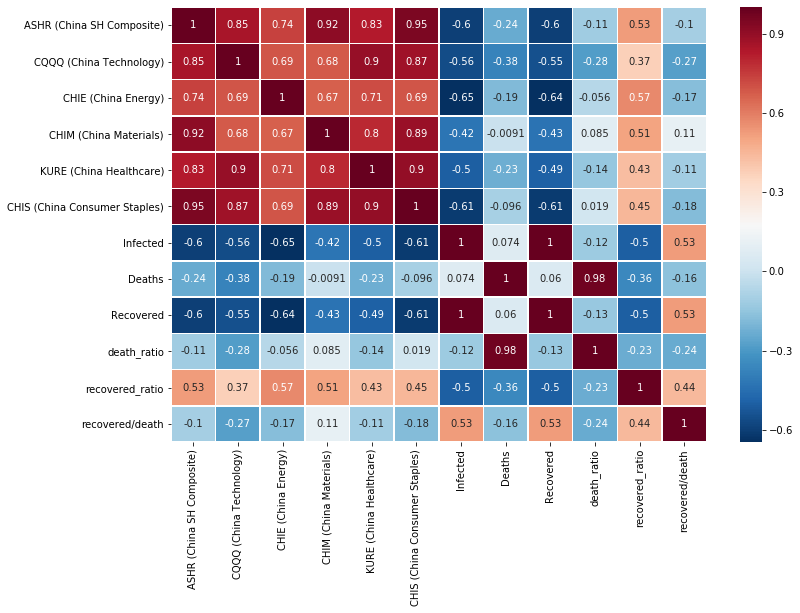

In [155]:
# China and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
china_correl = china_cv_raw_df.pct_change().corr(method='pearson')

fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(china_correl, 
            xticklabels=china_correl.columns,
            yticklabels=china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

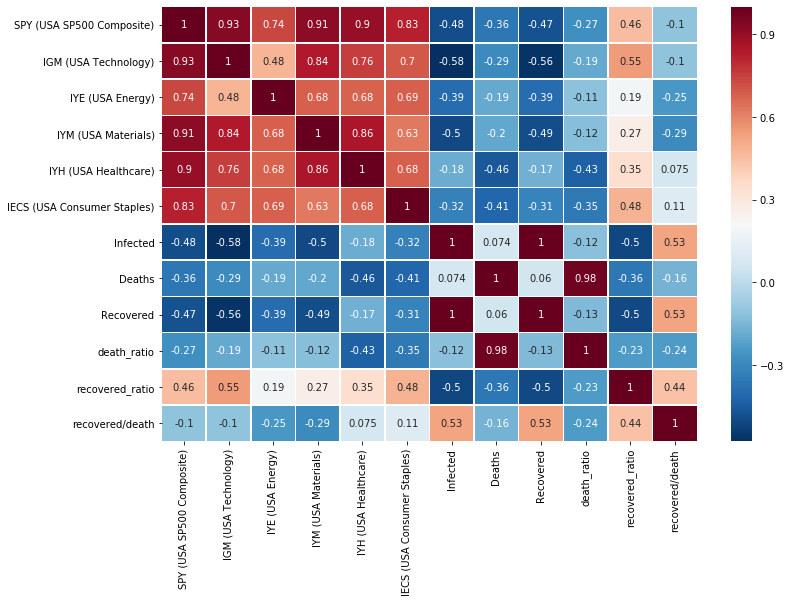

In [156]:
# USA and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_correl = usa_cv_raw_df.pct_change().corr(method='pearson')

fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_correl, 
            xticklabels=usa_correl.columns,
            yticklabels=usa_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

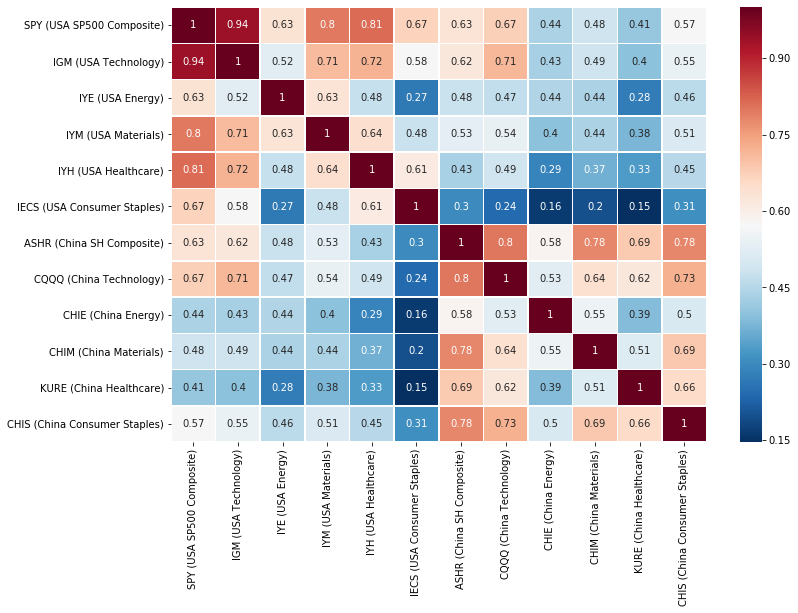

In [157]:
# China and the USA Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_china_correl = usa_china_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_china_correl, 
            xticklabels=usa_china_correl.columns,
            yticklabels=usa_china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [158]:
mc_corona = all_sum_cv['Infected'].montecarlo(sims=100, bust=-0.1, goal=1)

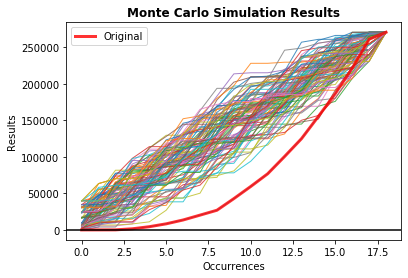

In [159]:
mc_corona.plot()

In [160]:
df_mc_corona =  mc_corona.data

In [161]:
df_all_data_pct_chg = all_data_raw_df.pct_change()*100

C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\phale\Anaconda3\envs\vizenv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2., 0., 1., 1., 0., 1., 2., 2., 2., 1.]),
 array([-1.8157959 , -1.48180362, -1.14781135, -0.81381907, -0.47982679,
        -0.14583452,  0.18815776,  0.52215004,  0.85614231,  1.19013459,
         1.52412687]),
 <a list of 10 Patch objects>)

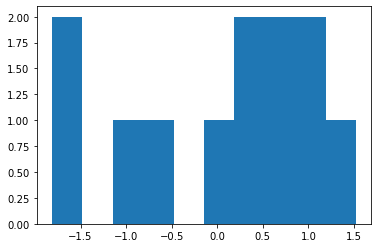

In [162]:
plt.hist(df_all_data_pct_chg['SPY (USA SP500 Composite)'])

(array([1., 0., 0., 4., 4., 1., 1., 0., 0., 1.]),
 array([-5.24109015, -4.13754905, -3.03400796, -1.93046686, -0.82692577,
         0.27661533,  1.38015642,  2.48369751,  3.58723861,  4.6907797 ,
         5.7943208 ]),
 <a list of 10 Patch objects>)

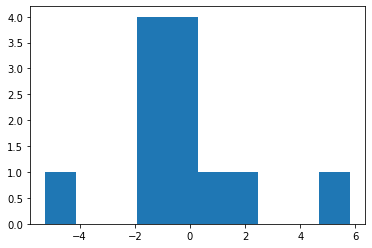

In [163]:
plt.hist(df_all_data_pct_chg['ASHR (China SH Composite)'])

(array([1., 0., 2., 6., 2., 0., 0., 0., 0., 1.]),
 array([-63.63636364, -41.84265843, -20.04895322,   1.74475199,
         23.53845721,  45.33216242,  67.12586763,  88.91957284,
        110.71327805, 132.50698326, 154.30068847]),
 <a list of 10 Patch objects>)

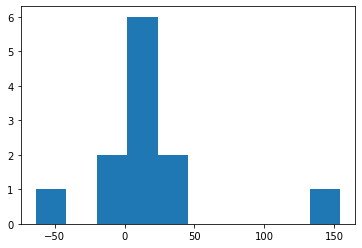

In [164]:
plt.hist(df_all_data_pct_chg['recovered_ratio'])

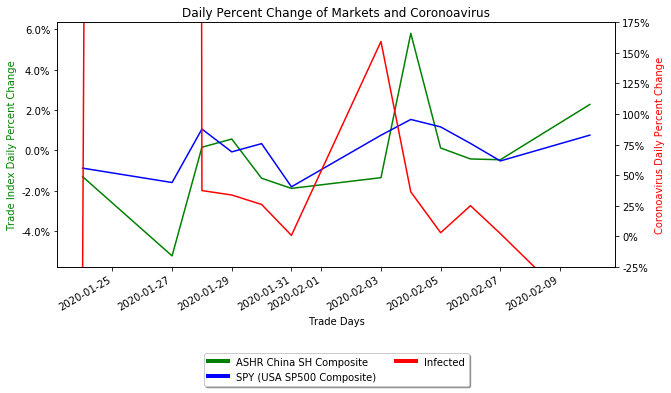

In [165]:
#created a double y axis chart to show percentage changes of market versus coronovirus
#looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
import matplotlib.ticker as mtick

x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['ASHR (China SH Composite)']
y2 = df_all_data_pct_chg['SPY (USA SP500 Composite)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets and Coronoavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-25, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['ASHR China SH Composite', 'SPY (USA SP500 Composite)', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

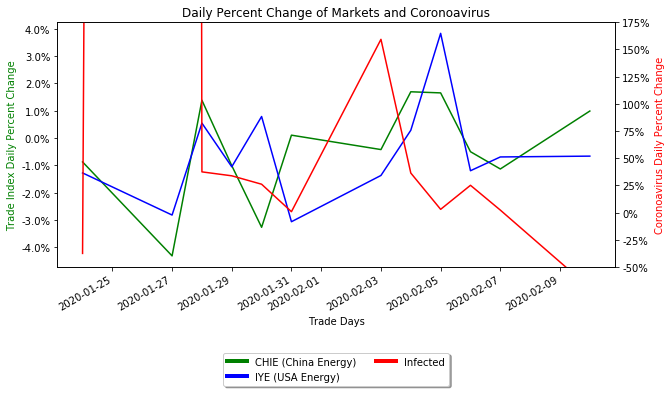

In [241]:
#created a double y axis chart to show percentage changes of market versus coronovirus
#looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
import matplotlib.ticker as mtick

x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIE (China Energy)']
y2 = df_all_data_pct_chg['IYE (USA Energy)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets and Coronoavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-50, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIE (China Energy)', 'IYE (USA Energy)', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

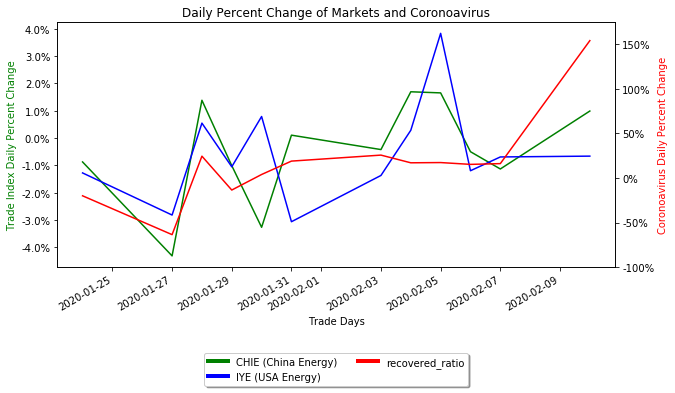

In [167]:
#created a double y axis chart to show percentage changes of market versus coronovirus
#looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
import matplotlib.ticker as mtick

x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIE (China Energy)']
y2 = df_all_data_pct_chg['IYE (USA Energy)']
y3 = df_all_data_pct_chg['recovered_ratio']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets and Coronoavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-100, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIE (China Energy)', 'IYE (USA Energy)', 'recovered_ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

In [199]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
all_stocks_raw_df = pd.concat([us_df, china_df], axis=1, sort=True)
all_stocks_raw_df.dropna(inplace=True)
pd.to_datetime(all_stocks_raw_df.index)
all_stocks_change_df = all_stocks_raw_df.pct_change()

In [220]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
CHINA_tech_covariance = all_stocks_change_df['CQQQ (China Technology)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_variance = all_stocks_change_df['ASHR (China SH Composite)'].rolling(window=30).var()
CHINA_tech_beta = CHINA_tech_covariance / CHINA_energy_variance
          
CHINA_energy_covariance = all_stocks_change_df['CHIE (China Energy)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_energy_beta = CHINA_energy_covariance / CHINA_variance

CHINA_materials_covariance = all_stocks_change_df['CHIM (China Materials)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_materials_beta = CHINA_materials_covariance / CHINA_variance

CHINA_health_covariance = all_stocks_change_df['KURE (China Healthcare)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_health_beta = CHINA_health_covariance / CHINA_variance

CHINA_staples_covariance = all_stocks_change_df['CHIS (China Consumer Staples)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_staples_beta = CHINA_staples_covariance / CHINA_energy_variance

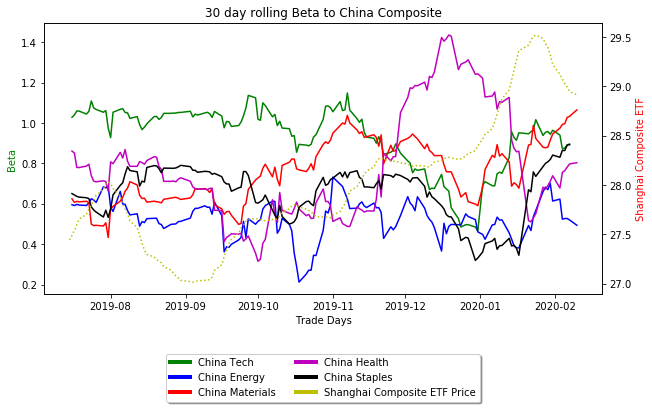

In [240]:
x = CHINA_tech_beta.index
y1 = CHINA_tech_beta
y2 = CHINA_energy_beta
y3 = CHINA_materials_beta
y4 = CHINA_health_beta
y5 = CHINA_staples_beta
y6 = all_stocks_raw_df['ASHR (China SH Composite)'].rolling(window=30).mean()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(x, y1, 'g-', y2, 'b-', y3, 'r-', y4, 'm-', y5, 'k-')
ax2 = ax1.twinx()                 
ax2.plot(x, y6, 'y:')

ax1.set_title('30 day rolling Beta to China Composite')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Beta', color='g')
ax2.set_ylabel('Shanghai Composite ETF', color='r')


#fig.autofmt_xdate()

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='y', lw=4)]
ax1.legend(custom_lines, ['China Tech', 'China Energy', 'China Materials', 'China Health', 'China Staples', 'Shanghai Composite ETF Price'], loc='upper center', bbox_to_anchor=(0.5, -.2),shadow=True, ncol=2)

plt.show()